# Projeto Final - DCA0118 - PROCESSAMENTO DIGITAL DE SINAIS

## Grupo: Everton, Fernando, Pedro, Rychardson e Teophilo.


In [1]:
# Fazer os imports das bibliotecas necessarias 
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import matplotlib.style as stl
stl.use('default')
PI = np.pi

### Exercicio 1 - Faça o download de um arquivo de áudio em https://freesound.org/browse/.

O audio escolhido para ser trabalhado no projeto é encontrado em https://freesound.org/people/Hamface/sounds/98671/

In [3]:
# Importando o audio para o python
signal , sample_rate = sf.read('/content/sample_data/gato.wav') #sample_rate pega a frequencia do sinal (no domínio do tempo) (ou taxa de amostragem)
period = 1/sample_rate #pois periodo é igual a 1/frequencia 

## a) Plote o sinal no domínio do tempo.

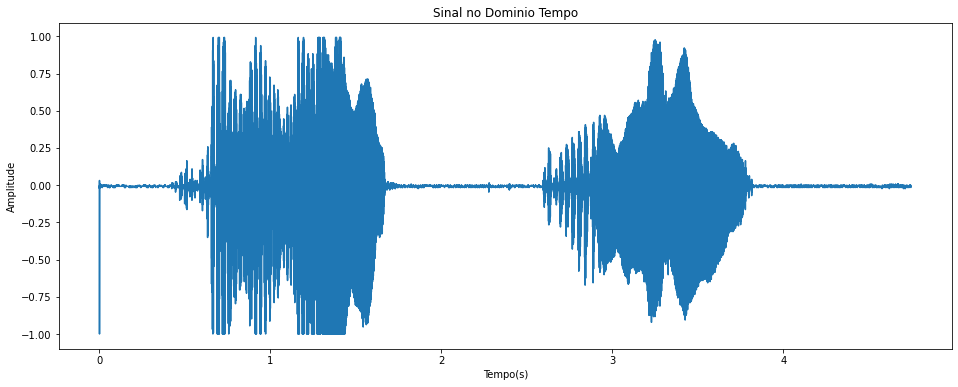

In [4]:
#Obtendo o vetor tempo
time = np.arange(0,len(signal)*period, period) #o vetor tempo começa em 0, e vai até o tamanho do sinal, igualmente espaçados pelo periodo

#Plotando sinal no dominio tempo
plt.figure(figsize=(16,6))
plt.title("Sinal no Dominio Tempo")
plt.xlabel("Tempo(s)")
plt.ylabel("Amplitude")
plt.plot(time,signal)
plt.show()

## b) Usando a transformada rápida de Fourier (FFT), de alguma biblioteca de Python, plote o espectro de frequências do sinal para as primeiras N amostras. Use um valor de N adequado. Escalone o eixo de frequências das N amostras da FFT de forma adequada

In [5]:
## pegando a fft do sinal
nfft = 50000
signal_fft = np.fft.fft(signal , nfft)
frequencias = np.fft.fftfreq(nfft,period)
mask = frequencias >=0 #o mask vai de -pi até +pi, então vc tá empurrando os sinal de 0 até 2pi

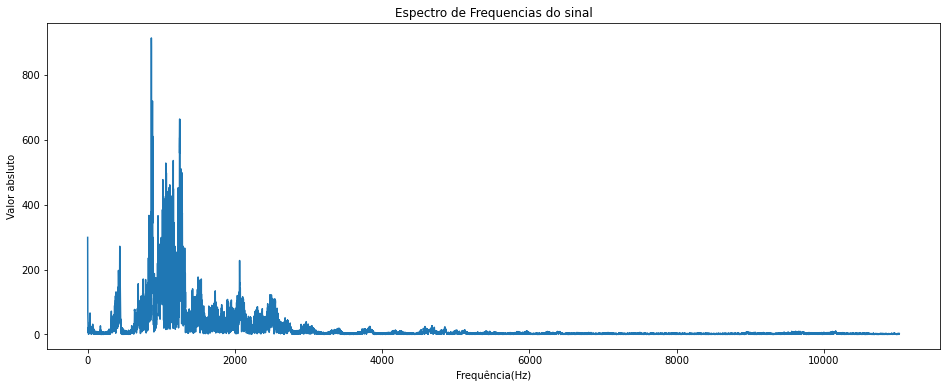

In [6]:
plt.figure(figsize=(16,6))
plt.title("Espectro de Frequencias do sinal")
plt.xlabel("Frequência(Hz)")
plt.ylabel("Valor absluto")
plt.plot(frequencias[mask],np.abs(signal_fft[mask]))
plt.show()

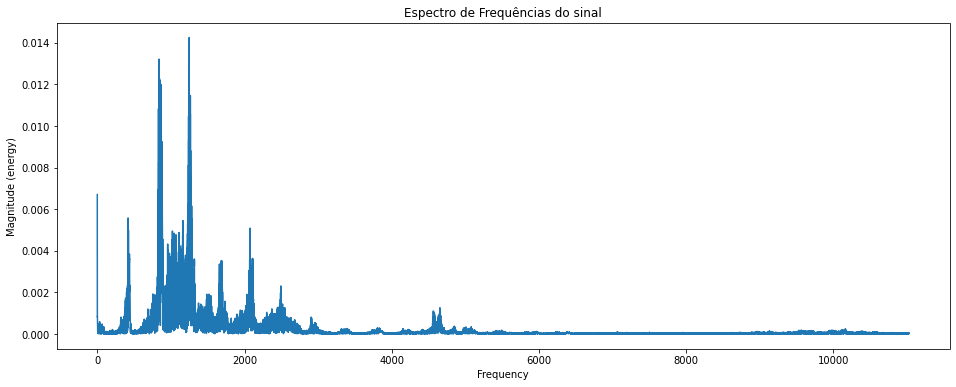

In [7]:
plt.figure(figsize=(16,6))
plt.title("Espectro de Frequências do sinal")
plt.magnitude_spectrum(signal,sample_rate)
plt.show()

##  c) projete um filtro digital passa-baixas com resposta ao impulso finita (FIR) que corte metade do conteúdo espectral do arquivo de áudio

In [8]:
fc = sample_rate/8 # frequência de corte (Hz)
wc = PI*fc/(sample_rate/2)
M = 101 #Número de amostras
M1 = -(M-1)/2
M2 = (M-1)/2
n1 = np.arange(M1,M2+1) # 101 amostras

#defininindo o sinc(wc*n1)
hlp = (wc/PI)*(np.sin(wc*n1))/(wc*n1)
hlp[n1 == 0] = wc/PI

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


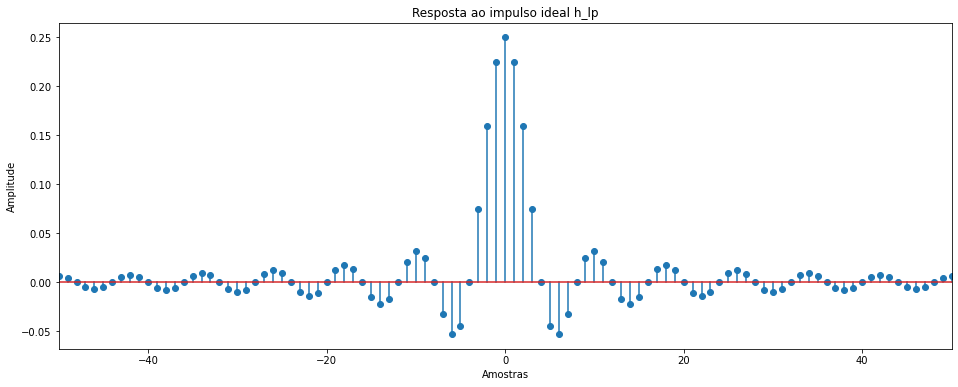

In [9]:
#Janela retangular
plt.figure(figsize=(16,6))
plt.stem(n1,hlp)
plt.title("Resposta ao impulso ideal h_lp")
plt.xlabel("Amostras")
plt.ylabel("Amplitude")
plt.xlim((M1,M2))
plt.show()

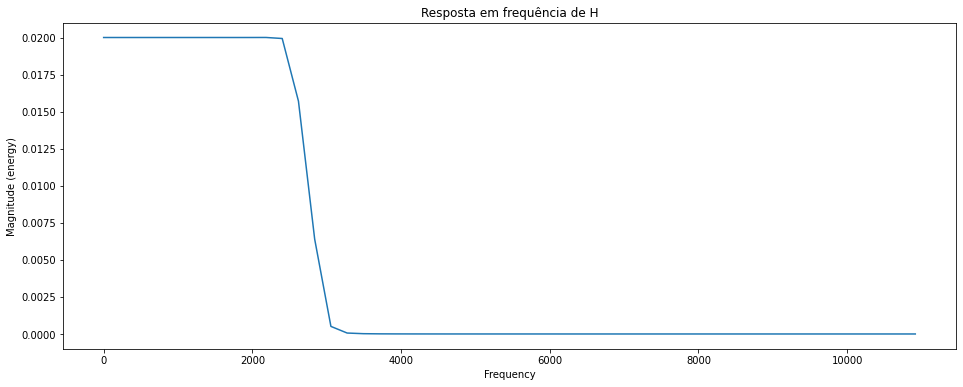

In [10]:
#Janela retangular
plt.figure(figsize=(16,6))
plt.magnitude_spectrum(hlp,Fs=sample_rate)
plt.title("Resposta em frequência de H")
plt.show()

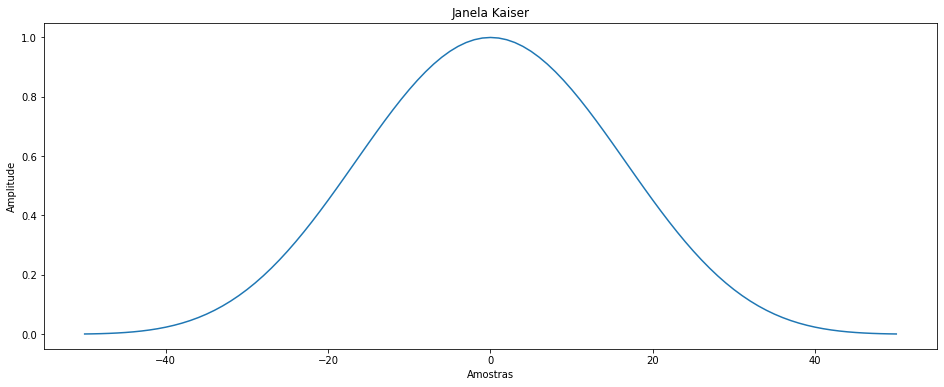

In [11]:
#Janela Kaiser

#parâmetros da janela Kaiser
r = 100 
beta = 0.1102*(r - 8.7)

kaiser_window = np.kaiser(M,beta)

plt.figure(figsize=(16,6))
plt.plot(n1,kaiser_window)
plt.title("Janela Kaiser")
plt.xlabel("Amostras")
plt.ylabel("Amplitude")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


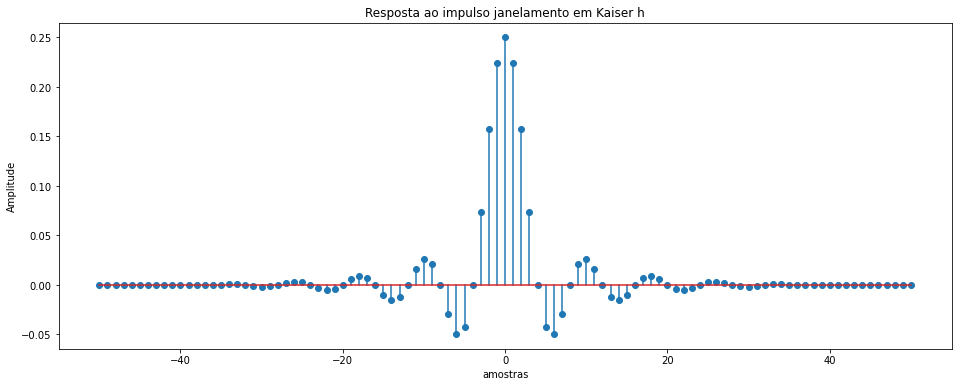

In [12]:
#Obtem o filtro hlp com a janela Kaiser 
hlp_kaiser = hlp * kaiser_window 
plt.figure(figsize=(16,6))
plt.stem(n1,hlp_kaiser)
plt.title("Resposta ao impulso janelamento em Kaiser h")
plt.xlabel("amostras")
plt.ylabel("Amplitude")
plt.show()

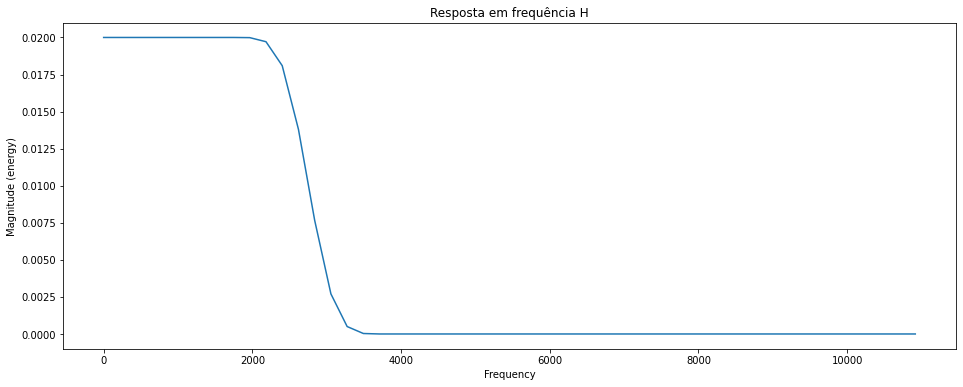

In [13]:
plt.figure(figsize=(16,6))
plt.magnitude_spectrum(hlp_kaiser,Fs=sample_rate)
plt.title("Resposta em frequência H")
plt.show()

## d) Com os coeficientes do filtro projetado, filtre o sinal

In [14]:
signal_filtered = np.convolve(signal,hlp_kaiser)

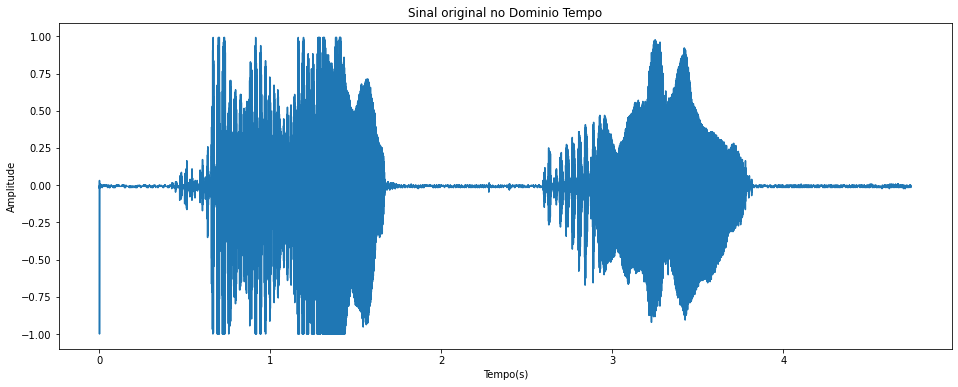

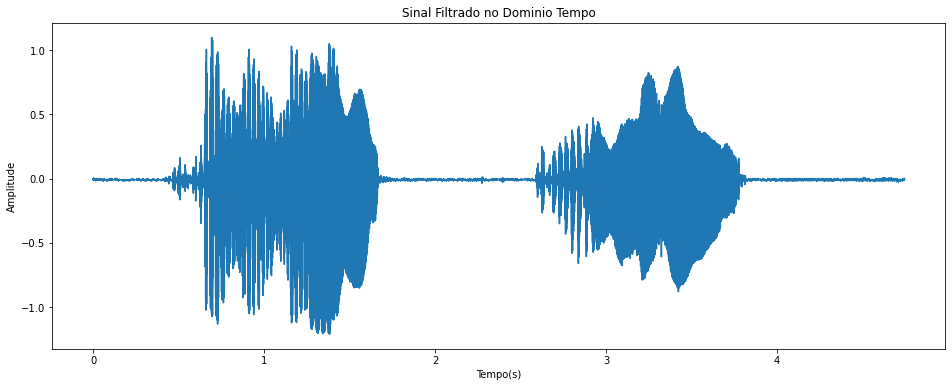

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

In [15]:
#Plotando sinal no dominio tempo
plt.figure(figsize=(16,6))
plt.title("Sinal original no Dominio Tempo")
plt.xlabel("Tempo(s)")
plt.ylabel("Amplitude")
plt.plot(time,signal)
plt.show()
plt.figure(figsize=(16,6))

plt.title("Sinal Filtrado no Dominio Tempo")
plt.xlabel("Tempo(s)")
plt.ylabel("Amplitude")
plt.plot(time,signal_filtered[M-1:])
plt.show()
plt.figure(figsize=(16,6))

In [16]:
sf.write('gato_filtrado.wav', signal_filtered ,sample_rate)

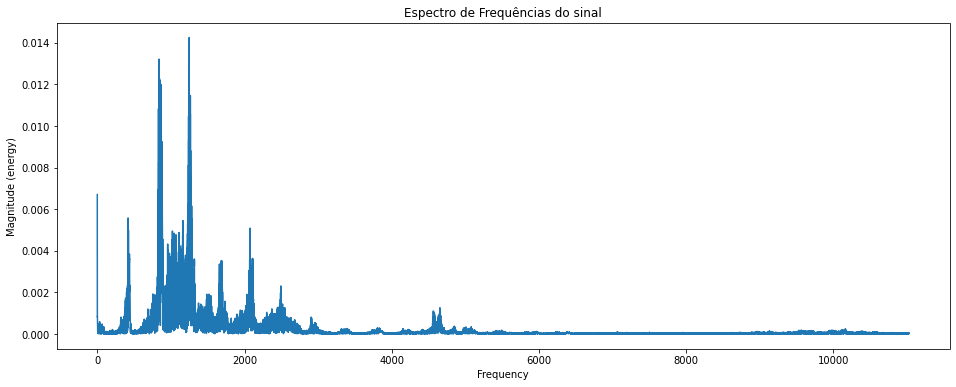

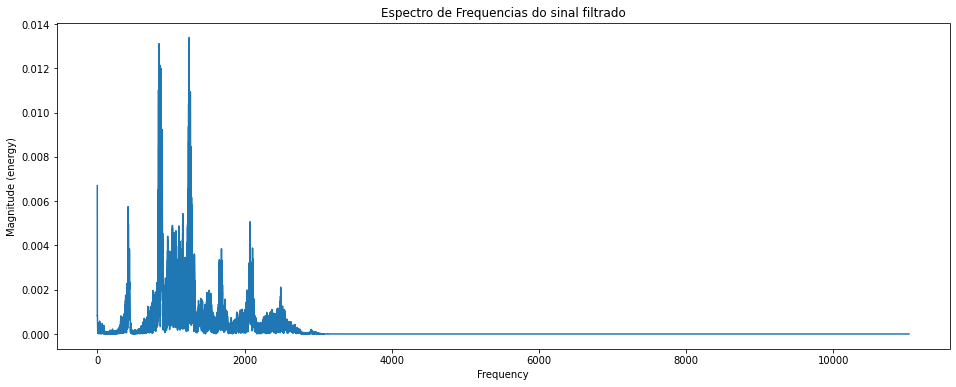

In [17]:
plt.figure(figsize=(16,6))
plt.title("Espectro de Frequências do sinal")
plt.magnitude_spectrum(signal,sample_rate)
plt.show()

plt.figure(figsize=(16,6))
plt.title("Espectro de Frequencias do sinal filtrado")
plt.magnitude_spectrum(signal_filtered,sample_rate)
plt.show()

#### d.1) Implemente a filtragem com a operação de convolução no domínio da frequência, fazendo uso de funções FFT e IFFT (utilize o método de sobreposição e soma ou sobreposição e armazenamento);

## e) Utilizando os conceitos de mudança de taxa de amostragem vistos em aula, interpole o sinal por um fator L = 2, fazendo uso de um filtro passa-baixas adequado;

In [18]:
# Função para refinir um FPB (reaproveita o que já fizemos no item C)
def filter_fir_kaiser_low_pass(signal,fs,fc,n_coeficientes,atenuacao):
  wc = PI*fc/(fs/2)

  M1 = -(n_coeficientes-1)/2
  M2 = (n_coeficientes-1)/2
  n1 = np.arange(M1,M2+1)

  hlp = (wc/PI)*(np.sin(wc*n1))/(wc*n1)
  hlp[n1 == 0] = wc/PI  

  # Janela kaiser
  r = atenuacao 
  beta = 0.1102*(r - 8.7)
  kaiser_window = np.kaiser(n_coeficientes,beta)

  #Obtem o filtro hlp com a janela Kaiser 
  hlp_kaiser = hlp * kaiser_window 
  signal_filtered = np.convolve(signal,hlp_kaiser) #Filtrando o sinal

  return signal_filtered[n_coeficientes-1:]

In [19]:
L = 2
new_fs = sample_rate*2
new_period = 1/new_fs
interpolated_signal = np.zeros(len(signal)*L)
cont = 0
for i in range (0,len(interpolated_signal),L):
  if(i%L ==0):
    interpolated_signal[i] = signal[cont]
    cont+=1

interpolated_signal_filtered = filter_fir_kaiser_low_pass(interpolated_signal,new_fs,new_fs/4,101,100) #aplicando o FBP no sinal interpolado

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


## f) Plote os conteúdos temporais e espectrais após a expansão e após a interpolação

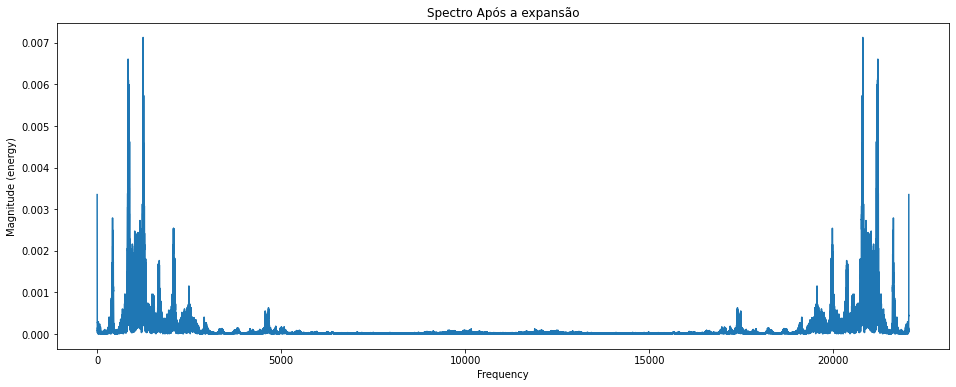

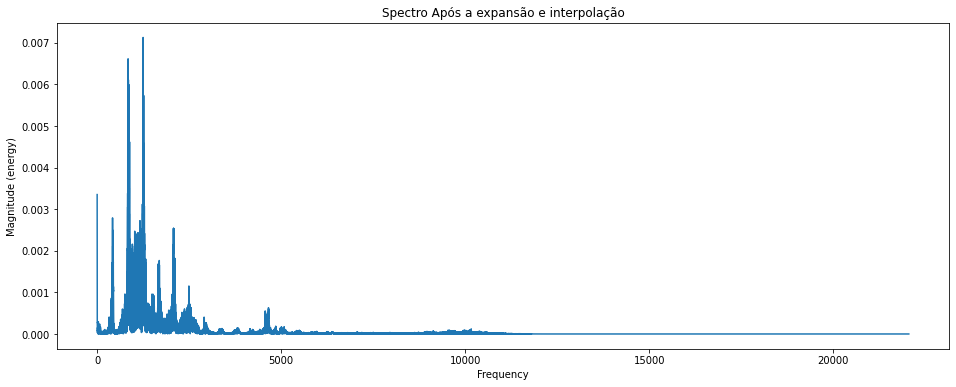

In [20]:
plt.figure(figsize=(16,6))
plt.title("Spectro Após a expansão")
plt.magnitude_spectrum(interpolated_signal,new_fs)
plt.show()

plt.figure(figsize=(16,6))
plt.title("Spectro Após a expansão e interpolação")
plt.magnitude_spectrum(interpolated_signal_filtered,new_fs)
plt.show()

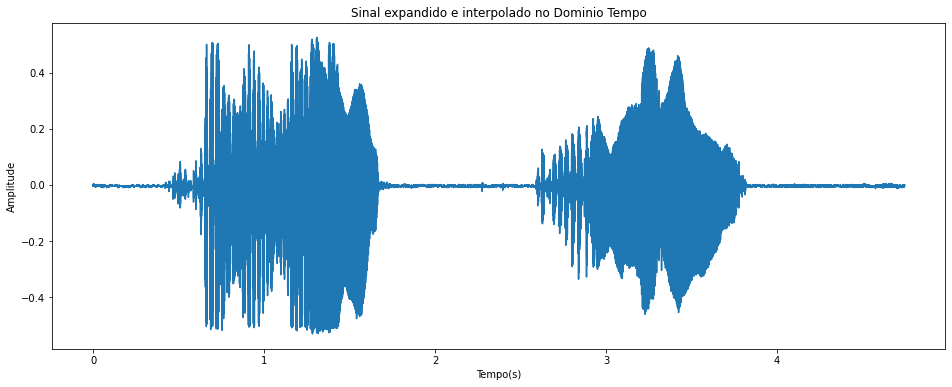

In [21]:
new_time = np.arange(0,len(interpolated_signal_filtered)*new_period , new_period) 

plt.figure(figsize=(16,6))
plt.title("Sinal expandido e interpolado no Dominio Tempo")
plt.xlabel("Tempo(s)")
plt.ylabel("Amplitude")
plt.plot(new_time,interpolated_signal_filtered)
plt.show()

In [22]:
sf.write('gato_interpolado.wav' , interpolated_signal_filtered , new_fs)